In [1]:
from Functions_Lab6 import*

In [2]:
import pandas as pd
# load csv files:
dataset_train = pd.read_csv('../DL_course_data/Lab5/train_data_stock.csv')
dataset_val = pd.read_csv('../DL_course_data/Lab5/val_data_stock.csv')
# reverse data so that they go from oldest to newest:
dataset_train = dataset_train.iloc[::-1]
dataset_val = dataset_val.iloc[::-1]
# concatenate training and test datasets:
dataset_total = pd.concat((dataset_train['Open'], dataset_val['Open']),
axis=0)
# select the values from the “Open” column as the variables to be predicted:
training_set = dataset_train.iloc[:, 1:2].values
val_set = dataset_val.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
T = 60
for i in range(T, len(training_set)):
    X_train.append(training_set_scaled[i-T:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# normalize the validation set according to the normalization applied to the training set:
inputs = dataset_total[len(dataset_total) - len(dataset_val) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
# split validation data into T time steps:
X_val = []
for i in range(T, T + len(val_set)): 
    X_val.append(inputs[i-T:i, 0])
X_val = np.array(X_val)
y_val = sc.transform(val_set)
# reshape to 3D array (format needed by LSTMs -> number of samples, timesteps, input dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [5]:
from tensorflow.keras.layers import Bidirectional
units = 40
batch_size = 16
input_size = 60
input_dim = 1
dr = 0.2
model = model_simple(units,batch_size,input_size,input_dim,dr)

W1007 17:39:42.981778 139799206815488 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f24ba327cf8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1007 17:39:43.008258 139799206815488 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f24b9bc5240>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1007 17:39:45.817624 139799206815488 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f24b9bc5f60>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1007 17:39:45.883531 139799206815488 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f24b07b3160>: Note that this layer is not optimized for performance. Please use tf.keras.laye

In [6]:
lr=0.001
n_epochs=100
model_hist = compile_fit(model,loss_function='mse',optimizer=Adam(lr),metrics=[MeanAbsoluteError()],x_train=X_train,y_train=y_train,x_test=X_val,y_test=y_val,batch_size=batch_size,n_epochs=n_epochs)

Train on 1920 samples, validate on 16 samples
Epoch 1/100
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.0155 - mean_absolute_error: 0.0847 - val_loss: 0.0150 - val_mean_absolute_error: 0.1172
Epoch 2/100
1920/1920 [==============================] - 2s 968us/sample - loss: 0.0028 - mean_absolute_error: 0.0410 - val_loss: 0.0070 - val_mean_absolute_error: 0.0735
Epoch 3/100
1920/1920 [==============================] - 2s 799us/sample - loss: 0.0024 - mean_absolute_error: 0.0377 - val_loss: 0.0162 - val_mean_absolute_error: 0.1204
Epoch 4/100
1920/1920 [==============================] - 2s 962us/sample - loss: 0.0018 - mean_absolute_error: 0.0326 - val_loss: 0.0021 - val_mean_absolute_error: 0.0389
Epoch 5/100
1920/1920 [==============================] - 2s 825us/sample - loss: 0.0017 - mean_absolute_error: 0.0311 - val_loss: 0.0092 - val_mean_absolute_error: 0.0865
Epoch 6/100
1920/1920 [==============================] - 2s 943us/sample - loss: 0.0017 - mean_absolu

Epoch 48/100
1920/1920 [==============================] - 2s 844us/sample - loss: 8.2183e-04 - mean_absolute_error: 0.0206 - val_loss: 0.0032 - val_mean_absolute_error: 0.0495
Epoch 49/100
1920/1920 [==============================] - 2s 950us/sample - loss: 7.9135e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0027 - val_mean_absolute_error: 0.0446
Epoch 50/100
1920/1920 [==============================] - 2s 801us/sample - loss: 8.4287e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0028 - val_mean_absolute_error: 0.0456
Epoch 51/100
1920/1920 [==============================] - 2s 905us/sample - loss: 8.1770e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0037 - val_mean_absolute_error: 0.0502
Epoch 52/100
1920/1920 [==============================] - 2s 944us/sample - loss: 7.8595e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0022 - val_mean_absolute_error: 0.0408
Epoch 53/100
1920/1920 [==============================] - 2s 942us/sample - loss: 8.2647e-04 - mean_absolute_error: 0.02

1920/1920 [==============================] - 2s 1ms/sample - loss: 6.4102e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0025 - val_mean_absolute_error: 0.0432
Epoch 95/100
1920/1920 [==============================] - 2s 842us/sample - loss: 6.4556e-04 - mean_absolute_error: 0.0183 - val_loss: 9.3575e-04 - val_mean_absolute_error: 0.0248
Epoch 96/100
1920/1920 [==============================] - 2s 845us/sample - loss: 6.2952e-04 - mean_absolute_error: 0.0181 - val_loss: 7.3692e-04 - val_mean_absolute_error: 0.0217
Epoch 97/100
1920/1920 [==============================] - 2s 871us/sample - loss: 6.1773e-04 - mean_absolute_error: 0.0180 - val_loss: 8.8529e-04 - val_mean_absolute_error: 0.0240
Epoch 98/100
1920/1920 [==============================] - 2s 937us/sample - loss: 6.1850e-04 - mean_absolute_error: 0.0178 - val_loss: 9.0836e-04 - val_mean_absolute_error: 0.0237
Epoch 99/100
1920/1920 [==============================] - 2s 850us/sample - loss: 5.7638e-04 - mean_absolute_error: 0.0

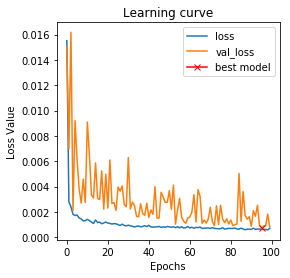

In [7]:
loss_curves_plot(model_hist)

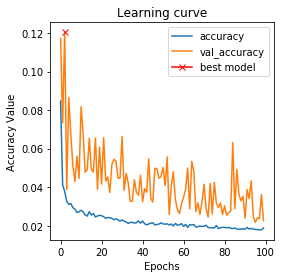

In [8]:
accuracy_curves_plot(model_hist,'mean_absolute_error')

In [28]:
predicted_stock_price = model.predict(X_val)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [29]:
predicted_stock_price
sc.inverse_transform(y_val)

array([[234.82397],
       [234.88022],
       [232.02715],
       [226.1417 ],
       [219.9693 ],
       [212.61897],
       [216.5197 ],
       [218.43552],
       [217.56773],
       [224.64503],
       [230.28824],
       [236.80374],
       [239.99211],
       [235.22568],
       [231.8214 ],
       [225.09827]], dtype=float32)

# Task 2

In [7]:
dataPath = '../DL_course_data/Lab5/HCP_lab/'
train_subjects_list = ['599469', '599671', '601127'] # your choice of 3 training subjects
val_subjects_list = ['613538']# your choice of 1 validation subjects 
bundles_list = ['CST_left', 'CST_right']
n_tracts_per_bundle = 20
X_train, y_train = load_streamlines(dataPath, train_subjects_list, bundles_list, n_tracts_per_bundle)
X_val, y_val = load_streamlines(dataPath, val_subjects_list, bundles_list, n_tracts_per_bundle)

In [10]:
units = 10
dr = 0.2
lr=0.001
n_epochs=50
optimizer = Adam(lr)

model = model_class(units,dr,batch_size=1)
model.summary()
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['binary_accuracy'])
model_fit = model.fit_generator(MyBatchGenerator(X_train, y_train, batch_size=1), epochs=n_epochs, validation_data=MyBatchGenerator(X_val, y_val, batch_size=1), validation_steps=len(X_val))


W1006 12:10:57.470469 139700101666560 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f0d2c738898>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:10:57.479392 139700101666560 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f0d2c738fd0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:10:57.627949 139700101666560 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f0d2c6d1a90>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W1006 12:10:57.696252 139700101666560 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f0d2c564ac8>: Note that this layer is not optimized for performance. Please use tf.keras.laye

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (1, None, 20)             1120      
_________________________________________________________________
dropout_8 (Dropout)          (1, None, 20)             0         
_________________________________________________________________
unified_lstm_9 (UnifiedLSTM) (1, None, 10)             1240      
_________________________________________________________________
dropout_9 (Dropout)          (1, None, 10)             0         
_________________________________________________________________
unified_lstm_10 (UnifiedLSTM (1, None, 10)             840       
_________________________________________________________________
dropout_10 (Dropout)         (1, None, 10)             0         
_________________________________________________________________
unified_lstm_11 (UnifiedLSTM (1, 10)                  

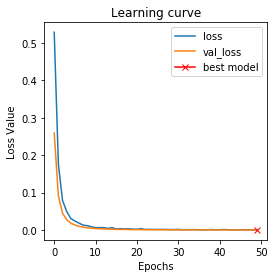

In [11]:
loss_curves_plot(model_fit)

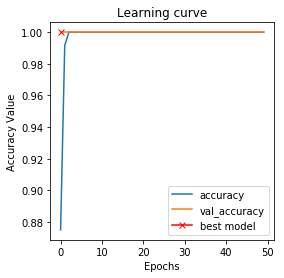

In [12]:
accuracy_curves_plot(model_fit,'binary_accuracy')

# Task 3

In [13]:
#parameters
base_dense=8
batch_size=8
LR=0.00001
img_w,img_h,img_ch=240,240,1
img_size = img_w

#optimizer
optimizer = Adam(LR)

#metrics list
metric_list=[dice_coef,precision,recall]

#loss functions list
loss_func_list=[dice_coef_loss,'binary_crossentropy']

#global variable
lab_file='Lab3'
type_file='MRI'

In [ ]:
#load the X_ray images

#first create the set with the dir info
x_train,y_train,x_test,y_test = create_data('Lab3','MRI',0.8)

#then load the images thanks to the info
x_train = load_data(x_train,img_w,img_h,img_ch)
y_train = load_data(y_train,img_w,img_h,img_ch,mask=True)
x_test = load_data(x_test,img_w,img_h,img_ch)
y_test = load_data(y_test,img_w,img_h,img_ch,mask=True)

#the intensity and resize rescale are already done in load_data function

In [ ]:
my_model6=get_unet_batch_lstm(base_dense,img_w,img_h,img_ch,dropout=True,dr=0.2)

In [ ]:
#with dice_coef_loss
model_hist=compile_fit(my_model6,loss_function=loss_func_list[1], optimizer=Adam(LR),metrics=[dice_coef],x_train=x_train,y_train=y_train,
                       x_test=x_test,y_test=y_test,batch_size=batch_size,n_epochs=50)

Train on 7522 samples, validate on 1881 samples
Epoch 1/50
7522/7522 [==============================] - 205s 27ms/sample - loss: 0.1526 - dice_coef: 0.0371 - val_loss: 0.0961 - val_dice_coef: 0.0504
Epoch 2/50
7522/7522 [==============================] - 202s 27ms/sample - loss: 0.0769 - dice_coef: 0.0920 - val_loss: 0.0633 - val_dice_coef: 0.1156
Epoch 3/50
7522/7522 [==============================] - 204s 27ms/sample - loss: 0.0502 - dice_coef: 0.1762 - val_loss: 0.0476 - val_dice_coef: 0.1834
Epoch 4/50
7522/7522 [==============================] - 205s 27ms/sample - loss: 0.0396 - dice_coef: 0.2358 - val_loss: 0.0406 - val_dice_coef: 0.2394
Epoch 5/50
7522/7522 [==============================] - 207s 27ms/sample - loss: 0.0340 - dice_coef: 0.2821 - val_loss: 0.0369 - val_dice_coef: 0.2804
Epoch 6/50
7522/7522 [==============================] - 207s 28ms/sample - loss: 0.0309 - dice_coef: 0.3169 - val_loss: 0.0338 - val_dice_coef: 0.3139
Epoch 7/50
7522/7522 [========================

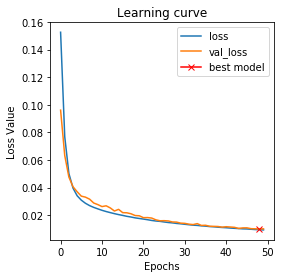

In [47]:
loss_curves_plot(model_hist)

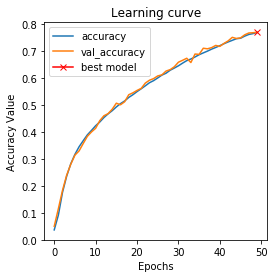

In [48]:
accuracy_curves_plot(model_hist,'dice_coef')